In [1]:
#Import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

In [2]:
#Import dataset
df1=pd.read_csv("fifa21_male2.csv", low_memory=False)

In [3]:
df1.shape

(17125, 107)

In [4]:
#Create a subset with the columns i will work with "Age, OVA, Wage, Value and BP"
fifa=df1[['Age', 'OVA', 'Wage', 'Value', 'BP']].copy()

In [5]:
fifa.head()

,Age,OVA,Wage,Value,BP
0,33,69,€7K,€625K,LWB
1,37,71,€7K,€600K,CM
2,33,71,€15K,€1.1M,CAM
3,36,68,€0,€0,ST
4,36,81,€12K,€5.5M,CAM


In [6]:
#Changing column names for standardization
fifa=fifa.rename(columns={'OVA':'Rating', 'Wage':'Salary', 'BP':'Position'})

In [7]:
fifa.head()

,Age,Rating,Salary,Value,Position
0,33,69,€7K,€625K,LWB
1,37,71,€7K,€600K,CM
2,33,71,€15K,€1.1M,CAM
3,36,68,€0,€0,ST
4,36,81,€12K,€5.5M,CAM


In [8]:
#checking value types
fifa.dtypes

Age          int64
Rating       int64
Salary      object
Value       object
Position    object
dtype: object

In [10]:
#Standardization of 'Salary' and 'Value' columns
#Here i take out the K and M on both columns and replace it with 000 if it has a K or with 000000 if it has an M
#Then i will convert them to int type
fifa ['Salary'] = fifa ['Salary'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.', '')
fifa ['Value'] = fifa ['Value'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.', '')
fifa.head()

/var/folders/6t/sjljqxpn7650823v529jrghc0000gn/T/ipykernel_25334/2907995403.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fifa ['Salary'] = fifa ['Salary'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.', '')
/var/folders/6t/sjljqxpn7650823v529jrghc0000gn/T/ipykernel_25334/2907995403.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fifa ['Value'] = fifa ['Value'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.', '')


,Age,Rating,Salary,Value,Position
0,33,69,7000,625000,LWB
1,37,71,7000,600000,CM
2,33,71,15000,11000000,CAM
3,36,68,0,0,ST
4,36,81,12000,55000000,CAM


In [11]:
#Changing types of "Salary" and "Value"
fifa[['Salary', 'Value']] = fifa[['Salary', 'Value']].astype(int)

In [12]:
#checking changes
fifa.dtypes

Age          int64
Rating       int64
Salary       int64
Value        int64
Position    object
dtype: object

In [13]:
#Null values
fifa.isnull().sum()

Age         0
Rating      0
Salary      0
Value       0
Position    0
dtype: int64

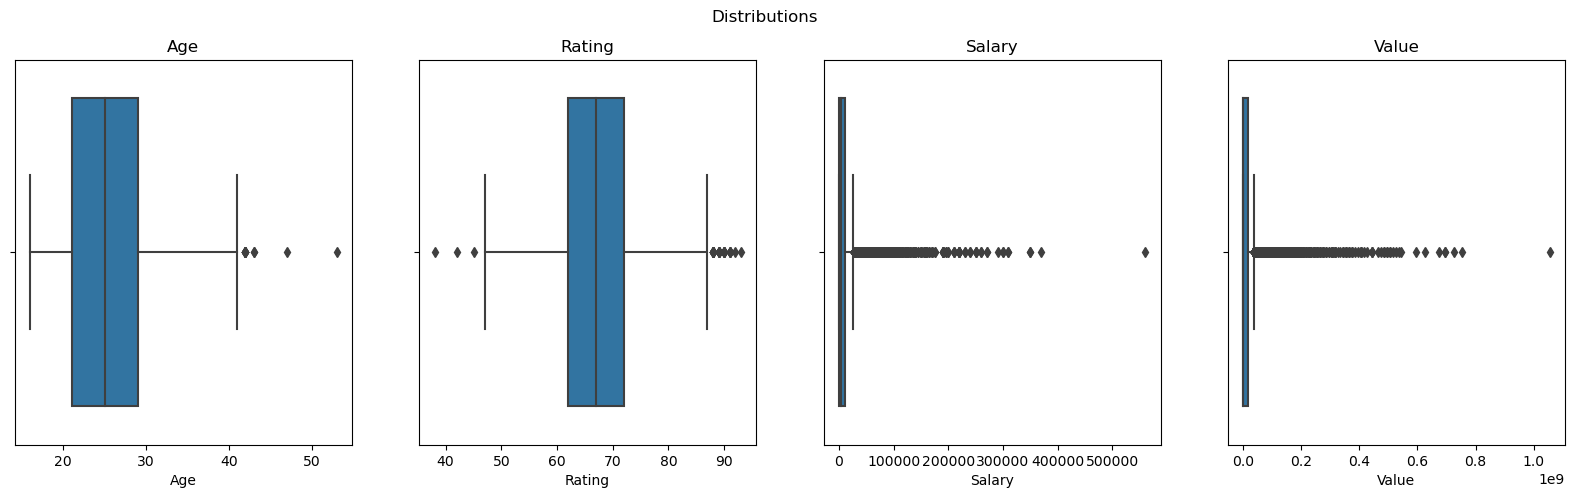

In [18]:
#Graphs to check distribution of numeric variables
fig, axes = plt.subplots(1, 4, figsize=(20,5))
  
fig.suptitle('Distributions')
                        
sns.boxplot(ax=axes[0],data=fifa, x='Age')
axes[0].set_title('Age')
sns.boxplot(ax=axes[1],data=fifa, x='Rating')
axes[1].set_title('Rating')
sns.boxplot(ax=axes[2],data=fifa, x='Salary')
axes[2].set_title('Salary')
sns.boxplot(ax=axes[3],data=fifa, x='Value')
axes[3].set_title('Value')
plt.show()

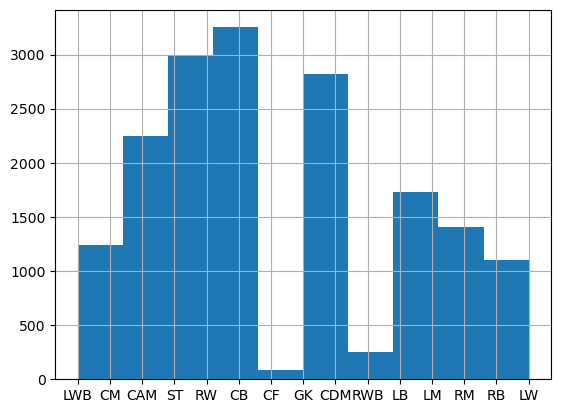

In [22]:
#Histplot to check the variable 'Position'
fifa['Position'].hist()
plt.show()

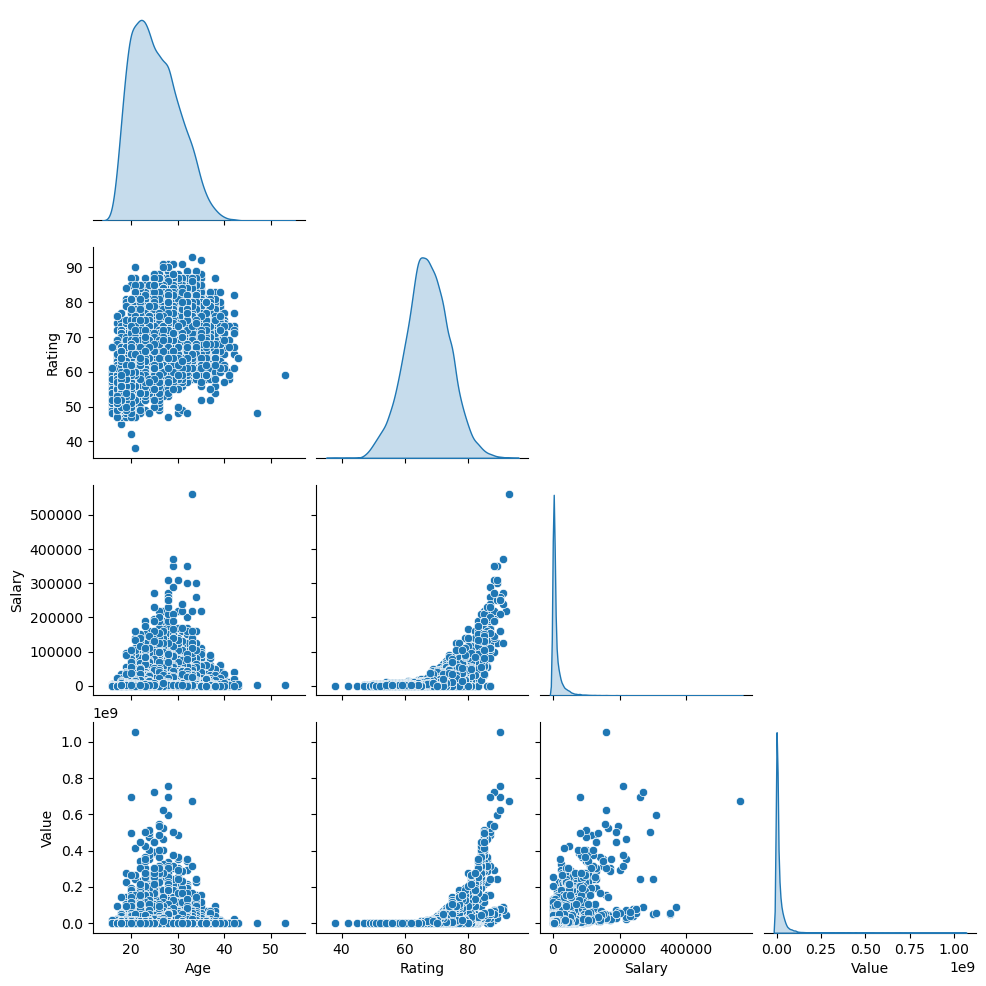

In [23]:
#Pairplot to check variable relationships, distribution and outliers(only for numerical variables)
sns.pairplot(fifa, diag_kind = 'kde', corner= True);

/var/folders/6t/sjljqxpn7650823v529jrghc0000gn/T/ipykernel_25334/795457859.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = fifa.corr()


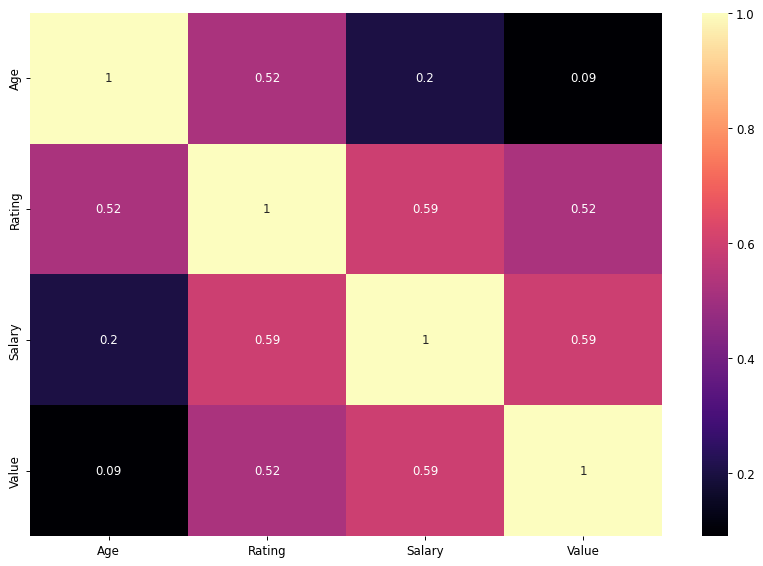

In [24]:
plt.figure(figsize= (12,8), dpi= 85)

corr_matrix = fifa.corr()
sns.heatmap(corr_matrix, annot=True, cmap= 'magma');

In [25]:
#separate the numerical in a subset 'num_fifa
num_fifa=fifa[['Value', 'Salary', 'Rating', 'Age']].copy()

In [30]:
num_fifa.head()

,Value,Salary,Rating,Age
0,625000,7000,69,33
1,600000,7000,71,37
2,11000000,15000,71,33
3,0,0,68,36
4,55000000,12000,81,36


In [28]:
num_fifa.dtypes

Value     int64
Salary    int64
Rating    int64
Age       int64
dtype: object

In [29]:
#normalize numerical subset into 'x_norm'
MinMaxtransformer = MinMaxScaler().fit(num_fifa)
x_norm = MinMaxtransformer.transform(num_fifa)
x_norm.shape
x_norm = pd.DataFrame(x_norm,columns=num_fifa.columns)
x_norm.head()

,Value,Salary,Rating,Age
0,0.000592,0.012500,0.563636,0.459459
1,0.000569,0.012500,0.600000,0.567568
2,0.010427,0.026786,0.600000,0.459459
3,0.000000,0.000000,0.545455,0.540541
4,0.052133,0.021429,0.781818,0.540541


In [31]:
#create subset with categorical variable 'position'
cat_fifa=fifa[['Position']].copy()

In [40]:
cat_fifa.head()

,Position
0,LWB
1,CM
2,CAM
3,ST
4,CAM


In [36]:
cat_fifa.dtypes

Position    object
dtype: object

In [37]:
cat_fifa.shape

(17125, 1)

In [38]:
#create dummies for cat_fifa subset 'cat_encoded'
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(cat_fifa)
encoded = encoder.transform(cat_fifa).toarray()
feature_names = encoder.get_feature_names_out(cat_fifa.columns)
cat_encoded = pd.DataFrame(encoded, columns=feature_names)

In [39]:
cat_encoded

,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [41]:
#concatenate the dataframes cat_encoded and x_norm
fifa_concat = pd.concat([cat_encoded, x_norm], axis=1)

In [42]:
#here the df concatenated
fifa_concat

,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST,Value,Salary,Rating,Age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000592,0.012500,0.563636,0.459459
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000569,0.012500,0.600000,0.567568
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010427,0.026786,0.600000,0.459459
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.545455,0.540541
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052133,0.021429,0.781818,0.540541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000521,0.003571,0.472727,0.162162
17121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000123,0.005357,0.327273,0.054054
17122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000123,0.003571,0.327273,0.054054
17123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000450,0.005357,0.436364,0.108108


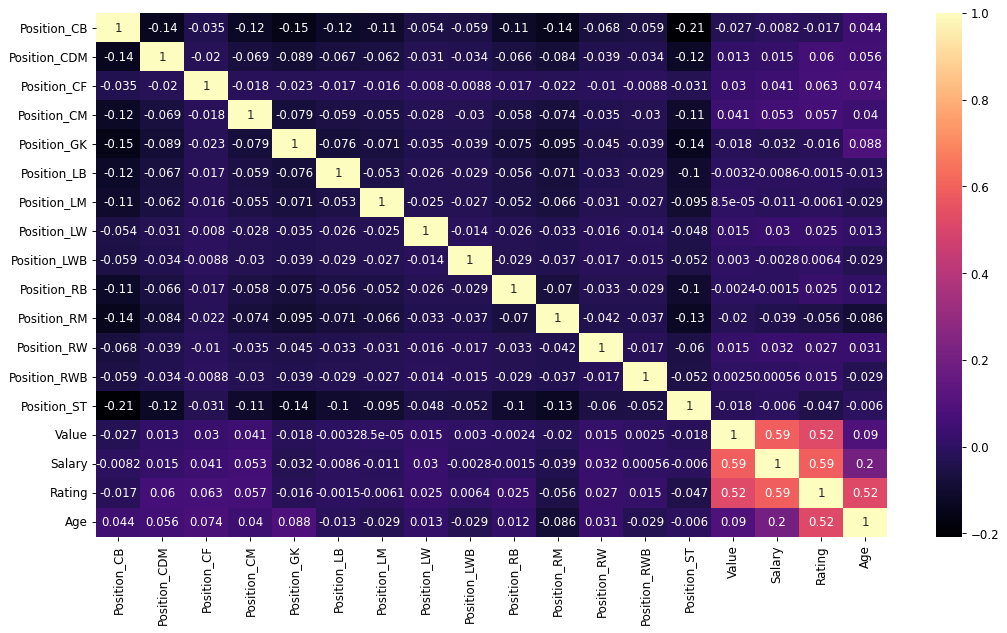

In [44]:
#correlation matrix once the df is concatenated
plt.figure(figsize= (15,8), dpi= 85)

corr_matrix = fifa_concat.corr()
sns.heatmap(corr_matrix, annot=True, cmap= 'magma');

In [46]:
Y=fifa_concat['Value']
X=fifa_concat.drop(['Value'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     729.9
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:41:59   Log-Likelihood:                 36965.
No. Observations:               17125   AIC:                        -7.389e+04
Df Residuals:                   17107   BIC:                        -7.375e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0375      0.001    -30.747   

In [47]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
lm=linear_model.LinearRegression()
model=lm.fit(X_train, y_train)
predictions=lm.predict(X_test)
r2_score(y_test, predictions)

0.3827721716791408

In [48]:
mse=mean_squared_error(y_test, predictions) 
print(mse)

0.0009292326547329517


In [49]:
rmse = math.sqrt(mse)
print(rmse)

0.030483317646426738


In [50]:
r2 = r2_score(y_test, predictions)
r2

0.3827721716791408

## here the model again dropping p values higher than 0,1

In [51]:
#here new subset with the significant variables with a P value lower than 0,1
fifamodel2=fifa_concat[['Position_CB', 'Position_RWB', 'Position_RB', 'Salary', 'Age', 'Rating', 'Value']].copy()

In [52]:
fifamodel2.head()

,Position_CB,Position_RWB,Position_RB,Salary,Age,Rating,Value
0,0.0,0.0,0.0,0.012500,0.459459,0.563636,0.000592
1,0.0,0.0,0.0,0.012500,0.567568,0.600000,0.000569
2,0.0,0.0,0.0,0.026786,0.459459,0.600000,0.010427
3,0.0,0.0,0.0,0.000000,0.540541,0.545455,0.000000
4,0.0,0.0,0.0,0.021429,0.540541,0.781818,0.052133


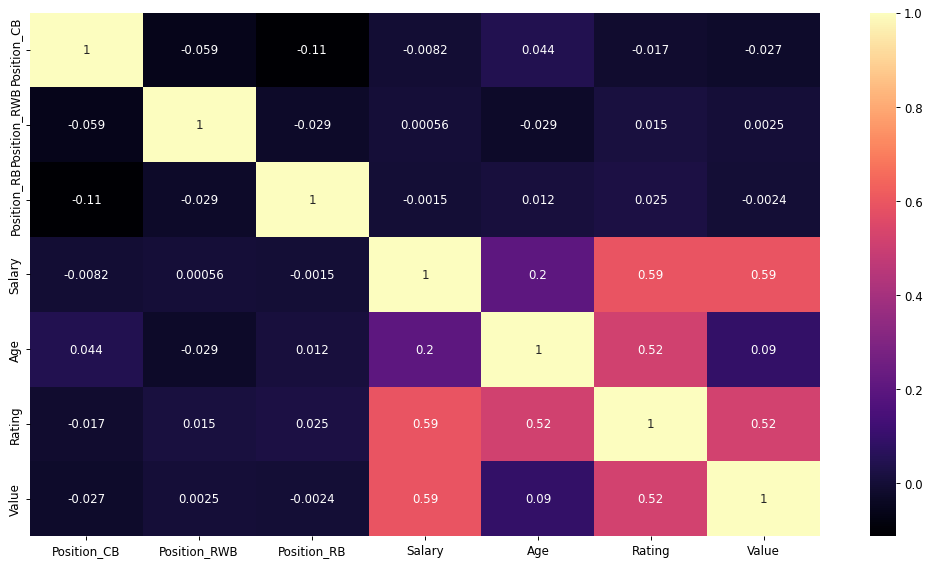

In [54]:
#correlation matrix
plt.figure(figsize= (15,8), dpi= 85)

corr_matrix = fifamodel2.corr()
sns.heatmap(corr_matrix, annot=True, cmap= 'magma');

In [55]:
#apply the model again
Y=fifamodel2['Value']
X=fifamodel2.drop(['Value'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     2066.
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:00:11   Log-Likelihood:                 36959.
No. Observations:               17125   AIC:                        -7.390e+04
Df Residuals:                   17118   BIC:                        -7.385e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0378      0.001    -34.726   

In [56]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
lm=linear_model.LinearRegression()
model=lm.fit(X_train, y_train)
predictions=lm.predict(X_test)
r2_score(y_test, predictions)

0.3839032397766323

In [57]:
mse=mean_squared_error(y_test, predictions) 
print(mse)

0.0009275298387504398


In [58]:
rmse = math.sqrt(mse)
print(rmse)

0.030455374546218272


In [59]:
r2 = r2_score(y_test, predictions)
r2

0.3839032397766323